# Task 2 - User Engagement analysis

In [1]:
# Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
%matplotlib inline
#display-related options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)

## Import Data

In [3]:
CSV_PATH = "../data/processed/processed.csv"

In [4]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [5]:
## getting number of columns, row and column information
def get_data_info(xDR_df: pd.DataFrame):
    
    row_count, col_count = xDR_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return xDR_df.info()

In [6]:
## basic statistics of each column and see the data at glance
def get_statistics_info(xDR_df: pd.DataFrame):
    
    return xDR_df.describe(include='all')

In [7]:
# reading the extracted tellco data and getting information

xDR_df = read_proccessed_data(CSV_PATH)

get_data_info(xDR_df)
get_statistics_info(xDR_df)

file read as csv
Number of rows: 150001
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms) 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500e+05,150000,150001.000,150000,150001.000,1.500e+05,1.500e+05,1.500e+05,1.500e+05,150001,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,1.500e+05,1.500e+05,1.500e+05,150001,150001,150001.000,150001.000,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05
unique,NaN,9997,NaN,6403,NaN,NaN,NaN,NaN,NaN,45548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/26/2019 7:25,NaN,4/25/2019 0:01,NaN,NaN,NaN,NaN,NaN,Uknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apple,Huawei B528S-23A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,203,NaN,1150,NaN,NaN,NaN,NaN,NaN,1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59826,19790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.014e+19,NaN,499.188,NaN,498.801,1.046e+05,2.082e+14,4.182e+10,4.846e+13,NaN,109.796,17.663,13300.046,1770.429,92.845,3.069,1.717,1.610,98.530,0.777,0.148,0.079,1.829e+06,1.409e+06,1.046e+08,NaN,NaN,3719.788,4022.083,1.795e+06,32928.434,5.751e+06,2.057e+06,1.792e+06,467373.442,1.163e+07,1.101e+07,1.163e+07,1.100e+07,4.220e+08,8.288e+06,4.211e+08,8.265e+06,4.112e+07,4.546e+08
std,2.893e+18,NaN,288.611,NaN,288.097,8.104e+04,2.145e+10,2.439e+12,2.241e+13,NaN,559.343,76.530,23971.799,4625.340,13.005,6.200,4.149,4.817,4.622,3.217,1.620,1.292,5.696e+06,4.643e+06,8.104e+07,NaN,NaN,9148.498,10133.432,1.035e+06,19006.178,3.309e+06,1.190e+06,1.036e+06,269969.307,6.711e+06,6.345e+06,6.725e+06,6.359e+06,2.440e+08,4.783e+06,2.432e+08,4.769e+06,1.128e+07,2.441e+08
min,6.918e+18,NaN,0.000,NaN,0.000,7.142e+03,2.040e+14,3.360e+10,4.400e+11,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,7.143e+06,NaN,NaN,1.000,1.000,1.200e+01,0.000,2.070e+02,3.000e+00,1.400e+01,2.000,5.300e+01,1.050e+02,4.200e+01,3.500e+01,2.516e+03,5.900e+01,3.290e+03,1.480e+02,2.867e+06,7.114e+06
25%,7.350e+18,NaN,250.000,NaN,251.000,5.744e+04,2.082e+14,3.365e+10,3.546e+13,NaN,35.000,3.000,43.000,47.000,91.000,0.000,0.000,0.000,99.000,0.000,0.000,0.000,1.488e+04,2.154e+04,5.744e+07,NaN,NaN,88.000,107.000,8.991e+05,16448.000,2.882e+06,1.024e+06,8.928e+05,233383.000,5.834e+06,5.518e+06,5.777e+06,5.476e+06,2.105e+08,4.128e+06,2.102e+08,4.146e+06,3.322e+07,2.431e+08
50%,7.350e+18,NaN,499.000,NaN,500.000,8.640e+04,2.082e+14,3.366e+10,3.572e+13,NaN,54.000,7.000,63.000,63.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,3.930e+04,4.679e+04,8.640e+07,NaN,NaN,205.000,220.000,1.794e+06,32920.000,5.766e+06,2.055e+06,1.794e+06,466250.000,1.162e+07,1.101e+07,1.164e+07,1.100e+07,4.234e+08,8.291e+06,4.218e+08,8.267e+06,4.114e+07,4.558e+08
75%,1.304e+19,NaN,749.000,NaN,750.000,1.324e+05,2.082e+14,3.368e+10,8.612e+13,NaN,109.796,17.663,19710.000,1120.000,100.000,4.000,1.000,1.000,100.000,0.000,0.000,0.000,6.796e+05,5.991e+05,1.324e+08,NaN,NaN,2765.000,2560.000,2.695e+06,4933

## Task 2.1

### Aggregate this features 
    ●   sessions frequency: which is identified by bearer id
    ●	the duration of the session  Dur. (ms)
    ●	the sessions total traffic (download and upload (bytes)) Total DL (Bytes)+Total UL (Bytes)
#### per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [8]:
#the total data volume (in Bytes) during this session for each application
xDR_df['Youtube'] = xDR_df['Youtube DL (Bytes)'] + xDR_df['Youtube UL (Bytes)']
xDR_df['Google'] = xDR_df['Google DL (Bytes)'] + xDR_df['Google UL (Bytes)']
xDR_df['Email'] = xDR_df['Email DL (Bytes)'] + xDR_df['Email UL (Bytes)']

xDR_df['Netflix'] = xDR_df['Netflix DL (Bytes)'] + xDR_df['Netflix UL (Bytes)']
xDR_df['Gaming'] = xDR_df['Gaming DL (Bytes)'] + xDR_df['Gaming UL (Bytes)']
xDR_df['Other'] = xDR_df['Other DL (Bytes)'] + xDR_df['Other UL (Bytes)']
xDR_df['SocialMedia'] = xDR_df['Social Media DL (Bytes)'] + xDR_df['Social Media UL (Bytes)']

xDR_df['All'] = xDR_df['Total DL (Bytes)'] + xDR_df['Total UL (Bytes)']

In [9]:
UEA_df = xDR_df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'All']].copy()

In [10]:
UEA_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),All
0,3.366e+10,1.311e+19,1.824e+06,3.456e+08
1,3.368e+10,1.311e+19,1.365e+06,7.072e+08
2,3.376e+10,1.311e+19,1.362e+06,3.077e+08
3,3.375e+10,1.311e+19,1.322e+06,8.894e+08
4,3.370e+10,1.311e+19,1.089e+06,6.077e+08


Now for each customer which is uniquely identified by thier MSISDN/Number we are going to count the number of seesions they have using Bearer Id and sum thier total duration and total data usage.

In [11]:
UEA_df = UEA_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'All': 'sum'})

In [12]:
UEA_df.sample(5)

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.378e+10,1,103138.0,8.700e+08
3.376e+10,2,59313.0,3.857e+08
3.366e+10,2,28636.0,5.547e+08
3.370e+10,1,86337.0,2.099e+08
3.366e+10,1,135349.0,1.376e+08


### Tope 10 users per thier number of sessions

In [13]:
UEA_df.nlargest(10, "Bearer Id")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.363e+10,18,8.792e+06,7.971e+09
3.361e+10,17,9.967e+06,8.846e+09
3.363e+10,17,1.855e+07,8.500e+09
3.366e+10,16,4.035e+06,7.706e+09
3.368e+10,15,4.866e+06,7.891e+09
3.376e+10,15,9.279e+06,8.515e+09
3.367e+10,13,8.745e+06,5.618e+09
3.360e+10,12,6.288e+06,4.976e+09
3.360e+10,12,5.208e+06,5.488e+09


### Tope 10 users per thier duration of the session 

In [14]:
UEA_df.nlargest(10, "Dur. (ms)")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.363e+10,17,1.855e+07,8.500e+09
3.361e+10,17,9.967e+06,8.846e+09
3.376e+10,15,9.279e+06,8.515e+09
3.363e+10,18,8.792e+06,7.971e+09
3.367e+10,13,8.745e+06,5.618e+09
3.366e+10,9,6.614e+06,4.000e+09
3.366e+10,9,6.289e+06,5.682e+09
3.360e+10,12,6.288e+06,4.976e+09
3.367e+10,6,5.650e+06,2.601e+09


### Tope 10 users per thier sessions total traffic 

In [15]:
UEA_df.nlargest(10, "All")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.361e+10,17,9.967e+06,8.846e+09
3.376e+10,15,9.279e+06,8.515e+09
3.363e+10,17,1.855e+07,8.500e+09
3.363e+10,18,8.792e+06,7.971e+09
3.368e+10,15,4.866e+06,7.891e+09
3.366e+10,16,4.035e+06,7.706e+09
3.367e+10,11,4.537e+06,7.309e+09
3.376e+10,12,5.322e+06,7.132e+09
3.366e+10,11,2.928e+06,6.872e+09


## Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

MinMax Scalar is sensitive to outliers. thus we need to deal with outliners.

In [16]:
def plot_hist(df: pd.DataFrame, column: str, color: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_dist(df: pd.DataFrame, column: str):
    plt.figure(figsize=(9, 7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    plt.show()


def plot_count(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    plt.show()


def plot_bar(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


def plot_heatmap(df: pd.DataFrame, title: str, cbar=False) -> None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0,
                vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()


def plot_box(df: pd.DataFrame, x_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()


def plot_box_multi(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

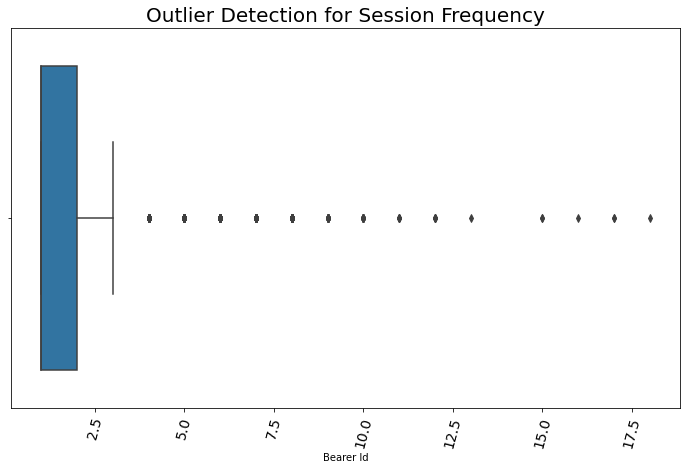

In [17]:
plot_box(UEA_df, 'Bearer Id', 'Outlier Detection for Session Frequency')

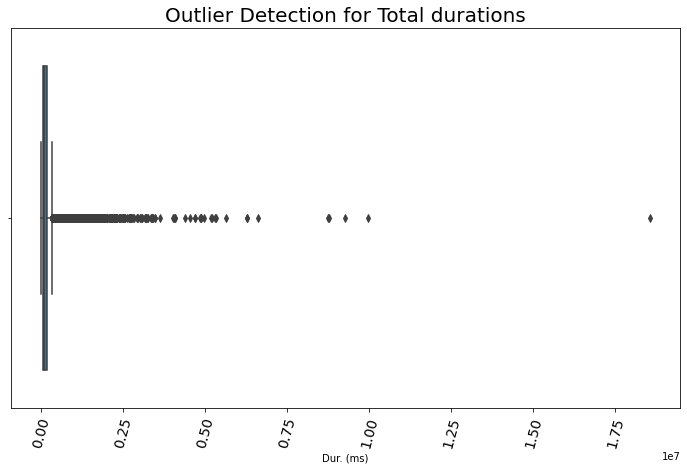

In [18]:
plot_box(UEA_df, 'Dur. (ms)', 'Outlier Detection for Total durations')

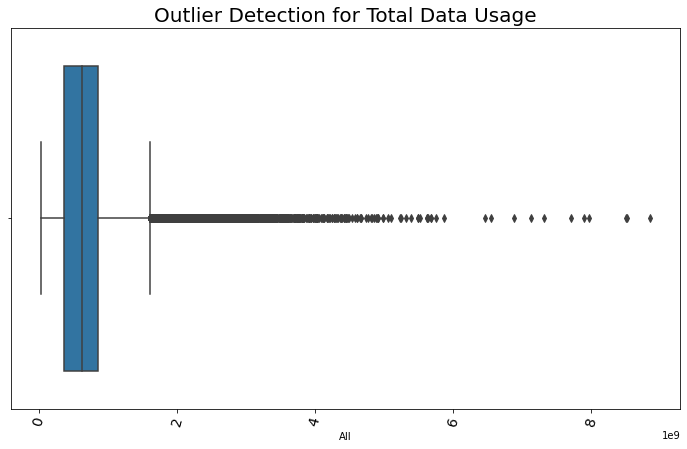

In [19]:
plot_box(UEA_df, 'All', 'Outlier Detection for Total Data Usage')

In [20]:
# if the vlaue is less than or morthan the lower_bound or uper bound replace it with lower bound and uper bound respecitvely
def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [21]:
NO_outliner_UEA_df = handle_outliers(UEA_df, 'Bearer Id')
NO_outliner_UEA_df = handle_outliers(NO_outliner_UEA_df, 'Dur. (ms)')
NO_outliner_UEA_df = handle_outliers(NO_outliner_UEA_df, 'All')


In [22]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [23]:
normalized_metrics = scale_and_normalize(NO_outliner_UEA_df, ['Bearer Id', 'Dur. (ms)', 'All'])

In [24]:
normalized_metrics.head()

,Bearer Id,Dur. (ms),All
0,0.000,0.543,0.840
1,0.000,0.990,0.141
2,0.000,0.750,0.662
3,0.000,0.481,0.877
4,0.404,0.095,0.910


In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

UEM_with_cluster = NO_outliner_UEA_df.copy()
UEM_with_cluster['clusters'] = pred


In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [27]:
UEM_with_cluster = UEM_with_cluster.rename(columns={'Bearer Id': 'sessions_frequency', 'Dur. (ms)': 'duration'})

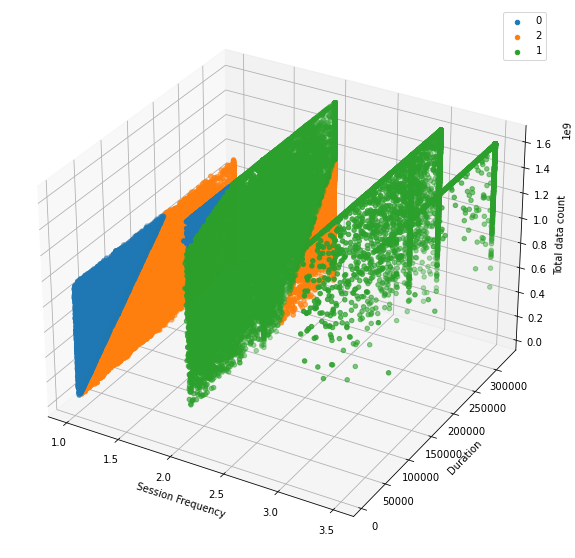

In [28]:
from matplotlib import cm
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
for s in UEM_with_cluster.clusters.unique():
    ax.scatter(UEM_with_cluster.sessions_frequency[UEM_with_cluster.clusters==s],UEM_with_cluster.duration[UEM_with_cluster.clusters==s],UEM_with_cluster.All[UEM_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Session Frequency')
    ax.set_ylabel('Duration')
    ax.set_zlabel('Total data count')
    ax.legend()

#### Cluster one description

In [29]:
cluser_1 =  UEM_with_cluster[UEM_with_cluster['clusters'] == 0]
cluser_1.describe()

,sessions_frequency,duration,All,clusters
count,39452.000,39452.000,3.945e+04,39452.0
mean,1.012,64464.156,6.363e+08,0.0
std,0.111,37566.201,2.273e+08,0.0
min,1.000,7142.000,5.287e+07,0.0
25%,1.000,29504.500,4.932e+08,0.0
50%,1.000,64182.500,6.569e+08,0.0
75%,1.000,86400.000,7.984e+08,0.0
max,2.000,179121.000,1.613e+09,0.0


#### Cluster two discription

In [30]:
cluser_2 =  UEM_with_cluster[UEM_with_cluster['clusters'] == 1]
cluser_2.describe()

,sessions_frequency,duration,All,clusters
count,26688.000,26688.000,2.669e+04,26688.0
mean,2.361,197152.137,1.141e+09,1.0
std,0.569,92797.742,3.698e+08,0.0
min,2.000,18235.000,1.198e+08,1.0
25%,2.000,120036.250,8.688e+08,1.0
50%,2.000,185449.500,1.153e+09,1.0
75%,3.000,282039.500,1.490e+09,1.0
max,3.500,323805.875,1.613e+09,1.0


### Cluster thee discription

In [31]:
cluser_3 =  UEM_with_cluster[UEM_with_cluster['clusters'] == 2]
cluser_3.describe()

,sessions_frequency,duration,All,clusters
count,40716.000,40716.000,4.072e+04,40716.0
mean,1.063,151084.930,3.892e+08,2.0
std,0.243,74297.302,2.309e+08,0.0
min,1.000,13755.000,3.325e+07,2.0
25%,1.000,87584.000,2.009e+08,2.0
50%,1.000,138391.500,3.460e+08,2.0
75%,1.000,179309.250,5.396e+08,2.0
max,2.000,323805.875,1.158e+09,2.0


## Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [32]:
xDR_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
0,1.311e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1.824e+06,2.082e+14,3.366e+10,3.552e+13,9.16456699548519E+015,42.000,5.000,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.824e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1.546e+06,24420.0,1.634e+06,1.271e+06,3.564e+06,137762.0,1.585e+07,2.501e+06,8.199e+06,9.656e+06,2.781e+08,1.434e+07,1.717e+08,8.814e+06,3.675e+07,3.089e+08,1.836e+07,2.906e+06,3.701e+06,1.786e+07,2.924e+08,1.806e+08,1.570e+06,3.456e+08
1,1.311e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1.365e+06,2.082e+14,3.368e+10,3.579e+13,L77566A,65.000,5.000,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1.926e+06,7165.0,3.494e+06,9.202e+05,6.290e+05,308339.0,2.025e+07,1.911e+07,1.834e+07,1.723e+07,6.088e+08,1.171e+06,5.269e+08,1.506e+07,5.380e+07,6.534e+08,3.936e+07,4.414e+06,9.374e+05,3.557e+07,6.099e+08,5.420e+08,1.933e+06,7.072e+08
2,1.311e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1.362e+06,2.082e+14,3.376e+10,3.528e+13,D42335A,109.796,17.663,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.362e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1.684e+06,42224.0,8.535e+06,1.694e+06,2.690e+06,672973.0,1.973e+07,1.470e+07,1.759e+07,6.163e+06,2.296e+08,3.956e+05,4.107e+08,4.216e+06,2.788e+07,2.798e+08,3.443e+07,1.023e+07,3.363e+06,2.375e+07,2.300e+08,4.149e+08,1.726e+06,3.077e+08
3,1.311e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1.322e+06,2.082e+14,3.375e+10,3.536e+13,T21824A,109.796,17.663,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.322e+09,undefined,undefined,17.0,207.0,6.441e+05,13372.0,9.024e+06,2.788e+06,1.440e+06,631229.0,2.139e+07,1.515e+07,1.399e+07,1.098e+06,7.995e+08,1.085e+07,7.490e+08,1.280e+07,4.332e+07,8.460e+08,3.653e+07,1.181e+07,2.071e+06,1.509e+07,8.104e+08,7.618e+08,6.575e+05,8.894e+08
4,1.311e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1.089e+06,2.082e+14,3.370e+10,3.541e+13,D88865A,109.796,17.663,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089e+09,Samsung,Samsung Sm-G390F,607.0,604.0,8.626e+05,50188.0,6.248e+06,1.501e+06,1.936e+06,173853.0,1.526e+07,1.896e+07,1.712e+07,4.152e+05,5.277e+08,3.530e+06,5.507e+08,1.391e+07,3.854e+07,5.691e+08,3.422e+07,7.749e+06,2.110e+06,1.754e+07,5.312e+08,5.646e+08,9.128e+05,6.077e+08


In [33]:
app_df = xDR_df.groupby(
    'MSISDN/Number').agg({'Youtube': 'sum', 'Google': 'sum', 'Email': 'sum', 'Netflix': 'sum', 'Gaming': 'sum', 'SocialMedia': 'sum', 'Other': 'sum'}).reset_index()
app_df.head()

,MSISDN/Number,Youtube,Google,Email,Netflix,Gaming,SocialMedia,Other
0,3.360e+10,2.162e+07,4.389e+06,1.331e+06,2.718e+07,8.125e+08,2.232e+06,3.866e+08
1,3.360e+10,1.243e+07,5.335e+06,3.308e+06,1.122e+07,1.198e+08,2.661e+06,2.817e+08
2,3.360e+10,2.133e+07,3.443e+06,3.205e+06,1.935e+07,5.388e+08,3.196e+06,5.017e+08
3,3.360e+10,6.977e+06,9.678e+06,2.285e+06,1.942e+06,3.911e+08,2.803e+05,3.528e+07
4,3.360e+10,4.153e+07,1.850e+07,3.305e+06,4.920e+07,1.315e+09,2.913e+06,8.048e+08


#### Top 10 users of Youtube

In [34]:
app_df.groupby('MSISDN/Number')['Youtube'].sum().nlargest(10)

MSISDN/Number
3.363e+10    4.530e+08
3.376e+10    3.963e+08
3.361e+10    3.944e+08
3.363e+10    3.745e+08
3.368e+10    3.174e+08
3.367e+10    3.152e+08
3.363e+10    3.088e+08
3.376e+10    3.032e+08
3.370e+10    3.027e+08
3.360e+10    2.841e+08
Name: Youtube, dtype: float64

#### Top 10 users Google

In [35]:
app_df.groupby('MSISDN/Number')['Google'].sum().nlargest(10)

MSISDN/Number
3.363e+10    1.522e+08
3.363e+10    1.423e+08
3.361e+10    1.280e+08
3.376e+10    1.232e+08
3.366e+10    1.165e+08
3.379e+10    1.103e+08
3.368e+10    1.099e+08
3.367e+10    1.050e+08
3.376e+10    9.709e+07
3.370e+10    9.194e+07
Name: Google, dtype: float64

#### Top 10 users Email

In [36]:
app_df.groupby('MSISDN/Number')['Email'].sum().nlargest(10)

MSISDN/Number
3.363e+10    4.242e+07
3.361e+10    4.079e+07
3.363e+10    4.063e+07
3.379e+10    3.631e+07
3.366e+10    3.600e+07
3.376e+10    3.369e+07
3.368e+10    3.151e+07
3.367e+10    3.042e+07
3.367e+10    3.034e+07
3.370e+10    2.906e+07
Name: Email, dtype: float64

#### Top 10 users Netflix

In [37]:
app_df.groupby('MSISDN/Number')['Netflix'].sum().nlargest(10)

MSISDN/Number
3.366e+10    3.995e+08
3.361e+10    3.614e+08
3.363e+10    3.570e+08
3.376e+10    3.346e+08
3.363e+10    3.287e+08
3.376e+10    3.183e+08
3.367e+10    3.139e+08
3.368e+10    3.091e+08
3.379e+10    3.059e+08
3.376e+10    2.921e+08
Name: Netflix, dtype: float64

#### Top 10 users Gaming

In [38]:
app_df.groupby('MSISDN/Number')['Gaming'].sum().nlargest(10)

MSISDN/Number
3.361e+10    7.749e+09
3.376e+10    7.461e+09
3.363e+10    7.327e+09
3.368e+10    6.971e+09
3.363e+10    6.888e+09
3.366e+10    6.726e+09
3.367e+10    6.646e+09
3.376e+10    6.269e+09
3.366e+10    6.104e+09
3.370e+10    5.754e+09
Name: Gaming, dtype: float64

#### Top 10 users SocialMedia

In [39]:
app_df.groupby('MSISDN/Number')['SocialMedia'].sum().nlargest(10)

MSISDN/Number
3.363e+10    4.337e+07
3.376e+10    3.978e+07
3.366e+10    3.541e+07
3.361e+10    2.829e+07
3.363e+10    2.714e+07
3.367e+10    2.425e+07
3.379e+10    2.397e+07
3.367e+10    2.380e+07
3.360e+10    2.308e+07
3.366e+10    2.300e+07
Name: SocialMedia, dtype: float64

#### Top 10 users Other

In [40]:
app_df.groupby('MSISDN/Number')['Other'].sum().nlargest(10)

MSISDN/Number
3.363e+10    8.168e+09
3.361e+10    7.639e+09
3.368e+10    6.799e+09
3.363e+10    6.355e+09
3.360e+10    6.327e+09
3.366e+10    6.317e+09
3.363e+10    5.305e+09
3.363e+10    5.118e+09
3.376e+10    5.078e+09
3.366e+10    5.014e+09
Name: Other, dtype: float64

In [41]:
cols = ['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia']
app_data=app_df[cols]
app_data.head()

,Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia
0,2.162e+07,4.389e+06,1.331e+06,2.718e+07,8.125e+08,3.866e+08,2.232e+06
1,1.243e+07,5.335e+06,3.308e+06,1.122e+07,1.198e+08,2.817e+08,2.661e+06
2,2.133e+07,3.443e+06,3.205e+06,1.935e+07,5.388e+08,5.017e+08,3.196e+06
3,6.977e+06,9.678e+06,2.285e+06,1.942e+06,3.911e+08,3.528e+07,2.803e+05
4,4.153e+07,1.850e+07,3.305e+06,4.920e+07,1.315e+09,8.048e+08,2.913e+06


Text(0, 0.5, 'Data usage')

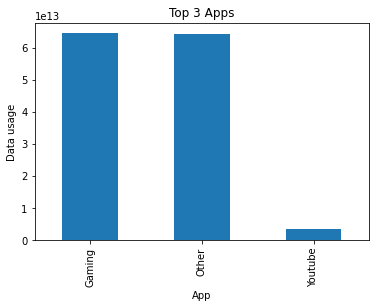

In [42]:
app_data.sum().nlargest(3).plot(kind='bar')
plt.title('Top 3 Apps')
plt.xlabel('App')
plt.ylabel('Data usage')

In [43]:
inertias = []
for k in range(1, 20):
    
    kmeans = KMeans(n_clusters=k).fit(normalized_metrics)
    inertias.append([k, kmeans.inertia_])

Text(0, 0.5, 'Inertia')

<Figure size 720x504 with 0 Axes>

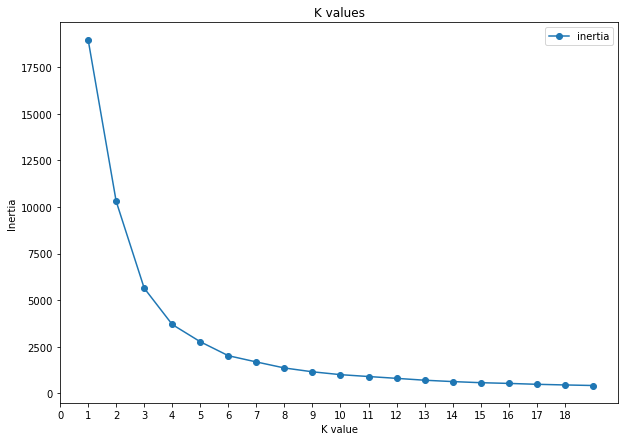

In [44]:
k_df = pd.DataFrame(columns=['k', 'inertia'])
k_df['k'] = [i[0] for i in inertias]
k_df['inertia'] = [i[1] for i in inertias]


plt.figure(figsize=(10,7))

k_df.plot( x='k', y='inertia', linestyle='-',
          marker='o', figsize=(10,7), title='K values').set_xlabel("K values")
plt.xticks(np.arange(len(k_df.index)))
plt.xlabel('K value')
plt.ylabel('Inertia')


#### As you can see the elblow is b/n 3 and 4. lets choose 3 as for k value

In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

UEM_with_cluster = NO_outliner_UEA_df.copy()
UEM_with_cluster['clusters'] = pred

In [49]:
UEM_with_cluster = UEM_with_cluster.rename(columns={'Bearer Id': 'sessions_frequency', 'Dur. (ms)': 'duration'})

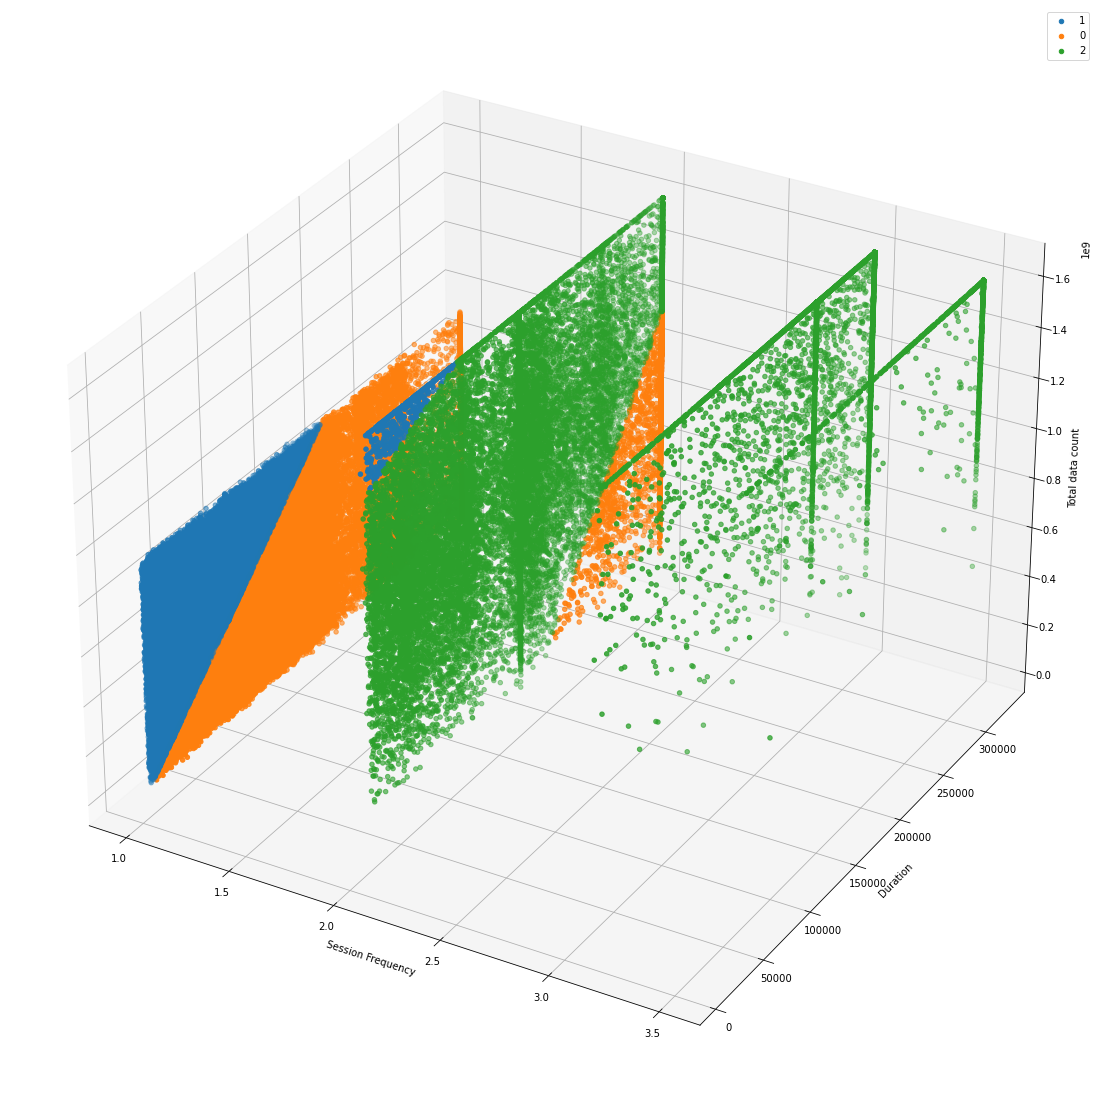

In [50]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
for s in UEM_with_cluster.clusters.unique():
    ax.scatter(UEM_with_cluster.sessions_frequency[UEM_with_cluster.clusters==s],UEM_with_cluster.duration[UEM_with_cluster.clusters==s],UEM_with_cluster.All[UEM_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Session Frequency')
    ax.set_ylabel('Duration')
    ax.set_zlabel('Total data count')
    ax.legend()

####  a.engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster 

In [52]:
UEM_with_cluster
kmeans

KMeans(n_clusters=3)

In [53]:
distance = kmeans.fit_transform(UEM_with_cluster)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

UEM_with_cluster['engagement_score'] = distance_from_less_engagement

In [54]:
distance

array([[1.25596594e+08, 5.38777303e+08, 5.72177173e+08],
       [5.96234340e+08, 1.26060822e+09, 1.49653777e+08],
       [1.57127498e+08, 8.21501388e+08, 2.89453083e+08],
       ...,
       [5.20970048e+08, 1.18534390e+09, 7.43897492e+07],
       [1.56806211e+08, 8.21180042e+08, 2.89774460e+08],
       [6.13940367e+08, 1.27831422e+09, 1.67359897e+08]])

In [55]:
UEM_with_cluster['MSISDN/Number'] = UEM_with_cluster.index

In [56]:
UEM_with_cluster.to_csv("../data/Score/engagement.csv")

In [59]:
UEM_with_cluster.sample(10)

,sessions_frequency,duration,All,clusters,engagement_score,MSISDN/Number
MSISDN/Number,,,,,,
3.366e+10,1.0,50895.000,3.752e+08,1,3.779e+08,3.366e+10
3.366e+10,1.0,86399.000,3.819e+08,0,3.712e+08,3.366e+10
3.368e+10,3.5,136431.000,1.613e+09,2,8.599e+08,3.368e+10
3.366e+10,1.0,51061.000,6.739e+08,1,7.924e+07,3.366e+10
3.366e+10,3.5,323805.875,1.613e+09,2,8.599e+08,3.366e+10
3.367e+10,1.0,86399.000,7.187e+08,1,3.437e+07,3.367e+10
3.366e+10,1.0,169831.000,8.604e+08,0,1.073e+08,3.366e+10
3.363e+10,1.0,42602.000,5.769e+08,1,1.762e+08,3.363e+10
3.365e+10,1.0,188863.000,3.069e+08,0,4.462e+08,3.365e+10
